Student Name: Shujahat Khalil



Roll Number: 22086115

## **Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
import numpy as np

# Assuming the file is named 'ecommerce_sales.csv' and located in the current directory
file_path = '/content/data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if necessary

# **Data Preprocessing**

### **Initial Data Examination**

Before making any changes, it's useful to examine the dataset to understand its structure and identify any immediate issues.

In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get a concise summary of the dataframe
print(df.info())

# Check for missing values in each column
print(df.isnull().sum())

  InvoiceNo StockCode                      Description  Quantity  \
0   C544414     22960         JAM MAKING SET WITH JARS        -2   
1    555276     48111            DOORMAT 3 SMILEY CATS         1   
2    575656     22952  60 CAKE CASES VINTAGE CHRISTMAS        48   
3    571636     20674              GREEN POLKADOT BOWL        16   
4    576657     22556   PLASTERS IN TIN CIRCUS PARADE         12   

        InvoiceDate  UnitPrice  CustomerID         Country  
0   2/18/2011 14:54       3.75     13408.0  United Kingdom  
1    6/1/2011 17:28      15.79         NaN  United Kingdom  
2  11/10/2011 14:29       0.55     13319.0  United Kingdom  
3  10/18/2011 11:41       1.25     13509.0  United Kingdom  
4  11/16/2011 11:03       1.65     12720.0         Germany  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270954 entries, 0 to 270953
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    270954 non-

### **Handling Missing Values**

Based on the initial examination, decide how to handle missing values. For CustomerID, it might be important for any customer analysis, so rows without CustomerID could be dropped or imputed, depending on the analysis goal. Missing Descriptions might be less critical but should still be addressed.

In [ ]:
# Drop rows where 'CustomerID' is missing
df.dropna(subset=['CustomerID'], inplace=True)

# Fill missing 'Description' with an identifier like 'No Description'
df['Description'].fillna('No Description', inplace=True)

# Check the result of handling missing values
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### **Data Type Conversion**

Convert InvoiceDate to datetime format to facilitate time-series analysis.

In [ ]:
# Convert 'InvoiceDate' from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203384 entries, 0 to 270953
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    203384 non-null  object        
 1   StockCode    203384 non-null  object        
 2   Description  203384 non-null  object        
 3   Quantity     203384 non-null  int64         
 4   InvoiceDate  203384 non-null  datetime64[ns]
 5   UnitPrice    203384 non-null  float64       
 6   CustomerID   203384 non-null  float64       
 7   Country      203384 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 14.0+ MB
None


### **Handling Cancellations**

Transactions indicating returns or cancellations start with 'C'. We need to decide whether to keep them for analysis or remove them. For simplicity, let's remove them in this step, but they might be useful for specific analyses.

In [ ]:
# Remove cancelled transactions
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

# Verify the removal
print(df.head())


  InvoiceNo StockCode                      Description  Quantity  \
2    575656     22952  60 CAKE CASES VINTAGE CHRISTMAS        48   
3    571636     20674              GREEN POLKADOT BOWL        16   
4    576657     22556   PLASTERS IN TIN CIRCUS PARADE         12   
5    569823     23298                   SPOTTY BUNTING         1   
7    574943    17091J           VANILLA INCENSE IN TIN        36   

          InvoiceDate  UnitPrice  CustomerID         Country  
2 2011-11-10 14:29:00       0.55     13319.0  United Kingdom  
3 2011-10-18 11:41:00       1.25     13509.0  United Kingdom  
4 2011-11-16 11:03:00       1.65     12720.0         Germany  
5 2011-10-06 12:15:00       4.95     16895.0  United Kingdom  
7 2011-11-08 07:52:00       0.38     13026.0  United Kingdom  


# **Analysis and Visualizations**

### **Average Unit Price by Country (Bar Chart)**

Objective: To compare the average unit price of products across different countries.

Explanation: This horizontal bar chart presents the average unit price of products for each country, highlighting the variations in pricing across different markets. Countries at the top of the chart have the highest average prices, possibly indicating a focus on premium products or higher operational costs in those regions.

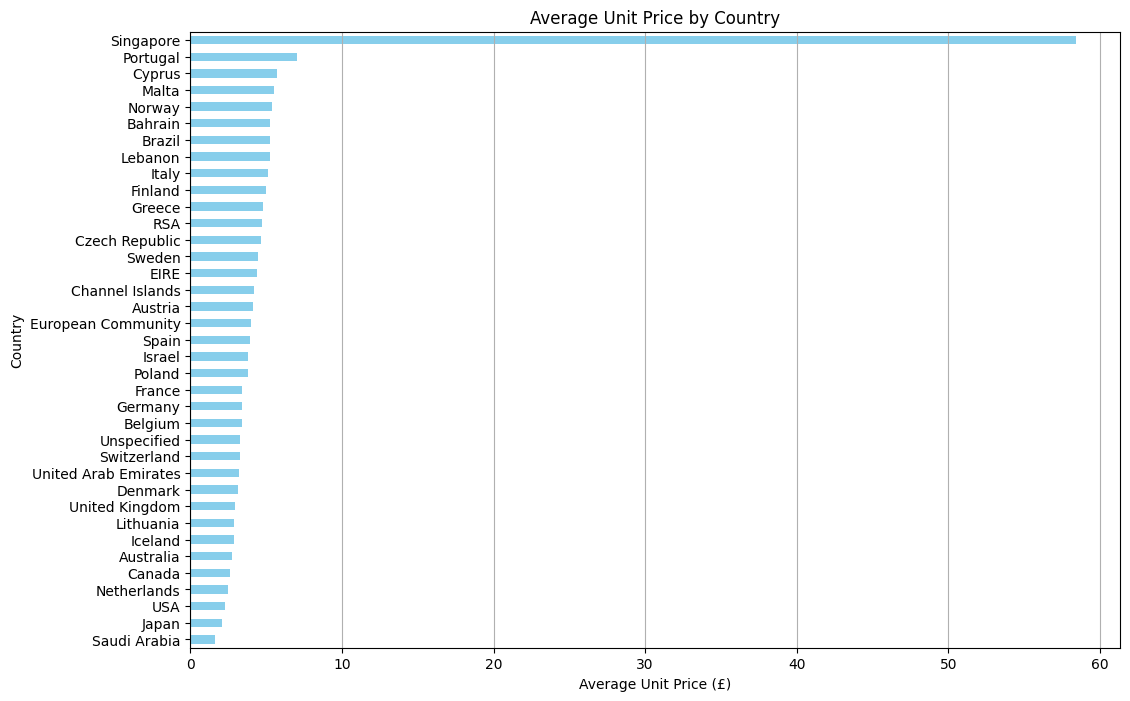

In [ ]:
# Calculate the average unit price for each country
average_unit_price_by_country = df.groupby('Country')['UnitPrice'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
average_unit_price_by_country.plot(kind='barh', color='skyblue')
plt.title('Average Unit Price by Country')
plt.xlabel('Average Unit Price (£)')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

### **Monthly Sales Volume (Line Graph)**

Objective: To observe sales trends over time.

Explanation: The line graph showcases the trend of total sales volume over time, providing insights into seasonal patterns, growth trends, or any anomalies in sales activities.

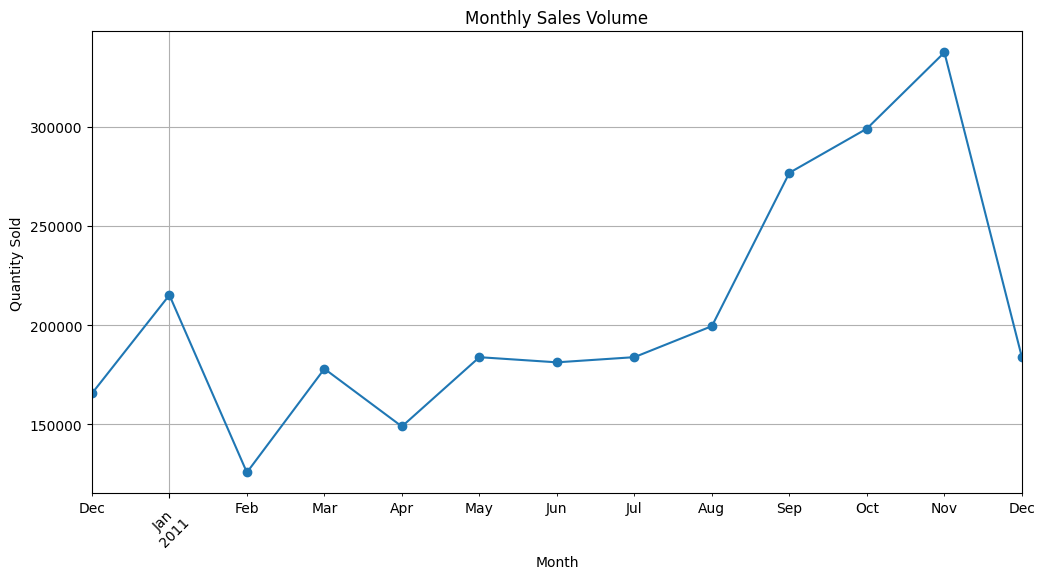

In [ ]:
# Extracting year and month from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregating sales volume by 'YearMonth'
sales_volume = df.groupby('YearMonth')['Quantity'].sum()

# Plotting
plt.figure(figsize=(12, 6))
sales_volume.plot(kind='line', marker='o')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### **Product Sales Distribution (Histogram)**

Objective: To analyze the distribution of sales quantities across transactions.

Explanation: This histogram reveals how product quantities in transactions are distributed, identifying common purchase sizes and outliers in sales transactions.

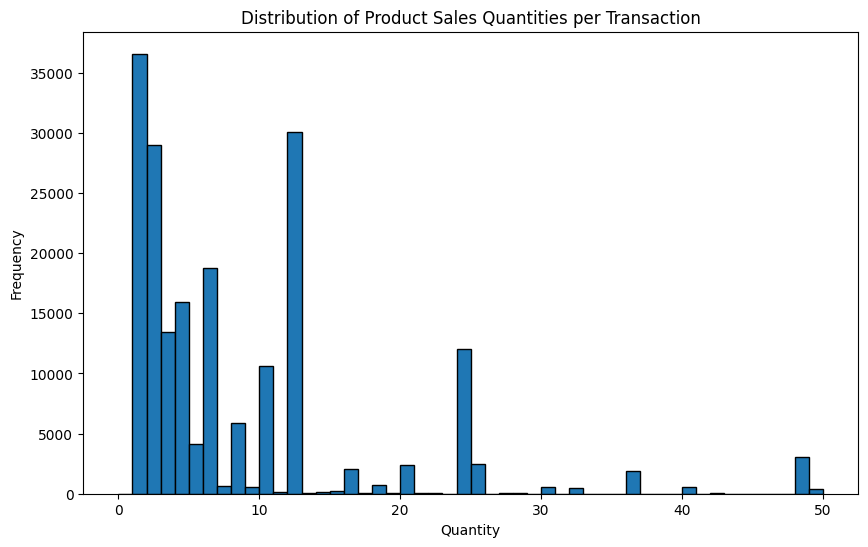

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, range=(0, 50), edgecolor='k')  # Limiting to a range for better clarity
plt.title('Distribution of Product Sales Quantities per Transaction')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### **Price Distribution of Products (Box Plot)**

Objective: To evaluate the distribution of product prices.

Explanation: The box plot provides a visual summary of the unit prices, highlighting the median, quartiles, and outliers. This can help in understanding the pricing strategy and identifying any anomalously priced items.

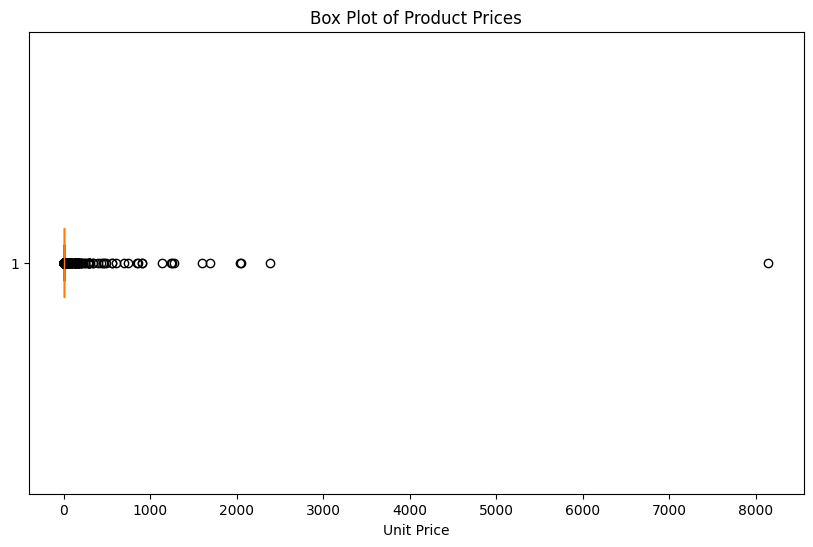

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['UnitPrice'], vert=False, patch_artist=True)
plt.title('Box Plot of Product Prices')
plt.xlabel('Unit Price')
plt.show()

### **Sales Correlation Matrix (Heatmap)**

Objective: To explore the correlation between numerical features in the dataset.

Explanation: This heatmap visualizes the correlation coefficients between numerical features, helping to identify any significant relationships or lack thereof. For instance, seeing if there's any noticeable correlation between UnitPrice and Quantity could indicate whether lower-priced items tend to be bought in larger quantities.

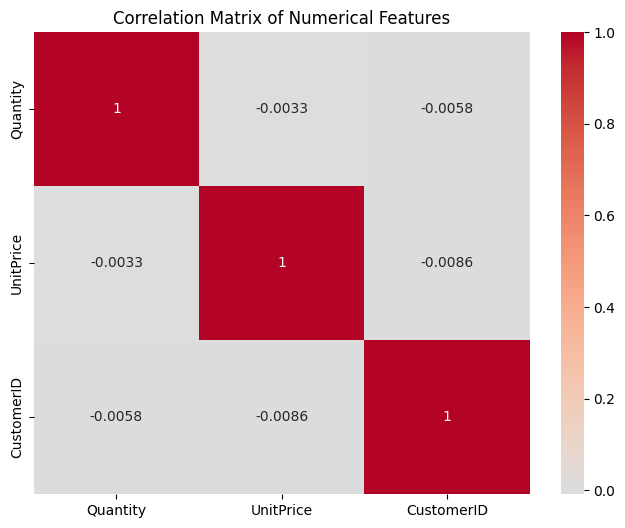

In [ ]:
import seaborn as sns

# Selecting numerical columns for correlation matrix
numerical_cols = ['Quantity', 'UnitPrice', 'CustomerID']
corr_matrix = df[numerical_cols].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **Top 10 Most Sold Products (Bar Chart)**

Objective: To identify the most popular products based on quantity sold.

Explanation: This bar chart ranks the top 10 products by total quantity sold, highlighting the bestsellers. It can guide inventory stocking decisions and promotional strategies.

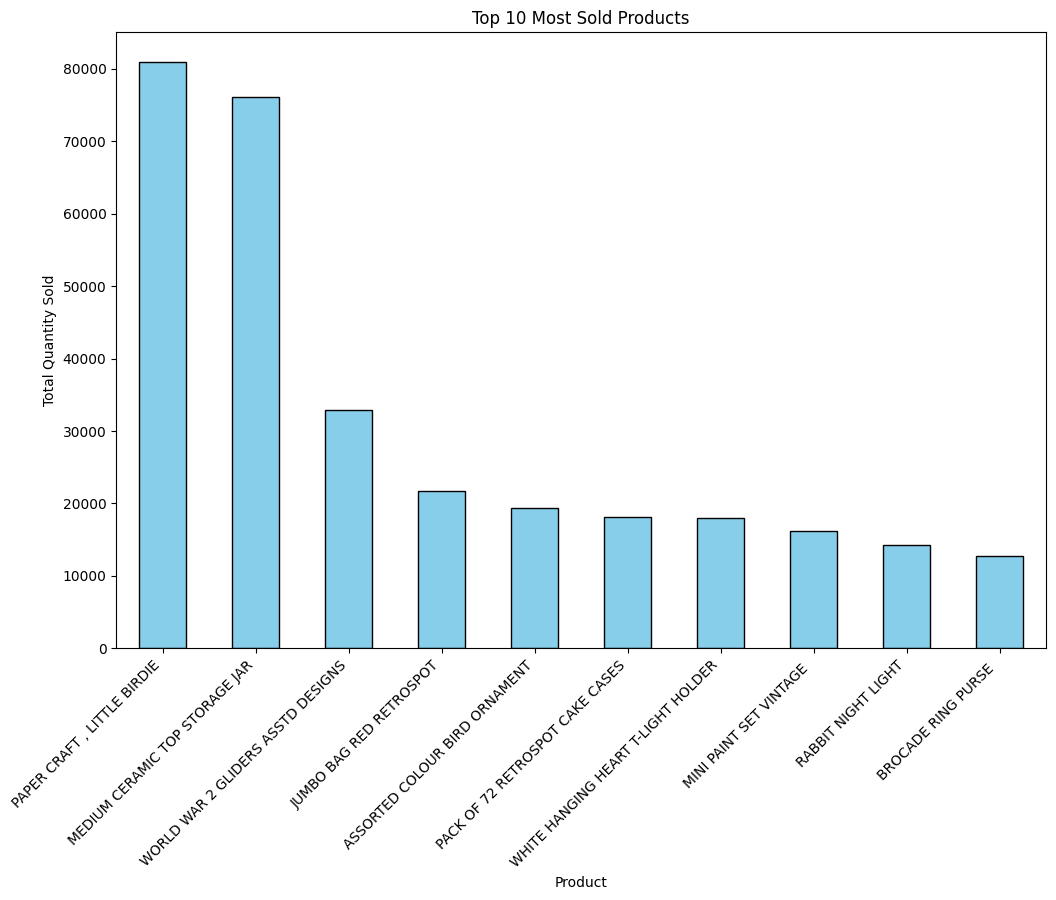

In [ ]:
# Aggregating quantity sold by 'Description'
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha="right")
plt.show()

### **Sales Volume by Hour (Scatter Plot)**

Objective: To examine the distribution of sales volume throughout the day.

Explanation: The scatter plot visualizes sales volume at different hours of the day, identifying peak sales periods. This can inform staffing and marketing timing decisions.

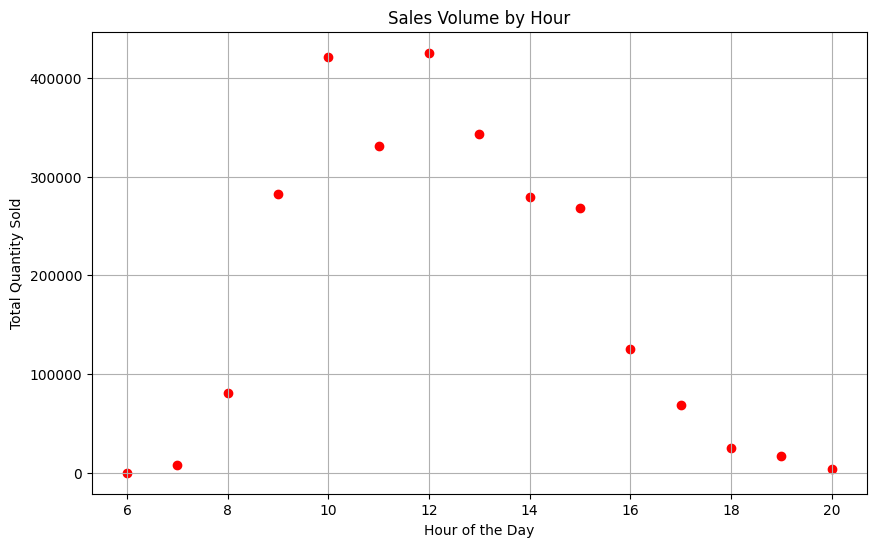

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour

# Aggregating sales volume by hour
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sales_by_hour.index, sales_by_hour.values, color='red')
plt.title('Sales Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

### **Yearly Revenue Over Time (Line Plot)**

Objective: To track the revenue generated over time on a yearly basis.

Explanation: This line plot illustrates the trend of total revenue generated each year, providing insights into business growth, seasonal variations, or the impact of specific events on sales. The use of markers ('o') highlights the data points for each year, making it easier to observe year-on-year changes.

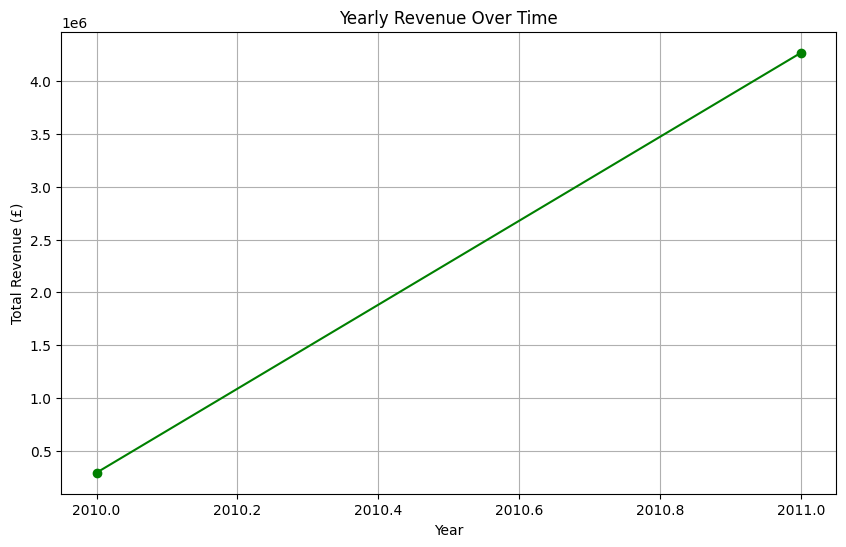

In [ ]:
# First, calculate total revenue per transaction
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Extract year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Aggregate total revenue by year
yearly_revenue = df.groupby('Year')['TotalRevenue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
yearly_revenue.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Yearly Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue (£)')
plt.grid(True)
plt.show()

### **Sales Distribution by Country (Pie Chart)**

Objective: To understand the market distribution by country.

Explanation: This pie chart highlights the proportion of sales transactions attributed to each country. It helps in identifying the primary markets and potential areas for market expansion.

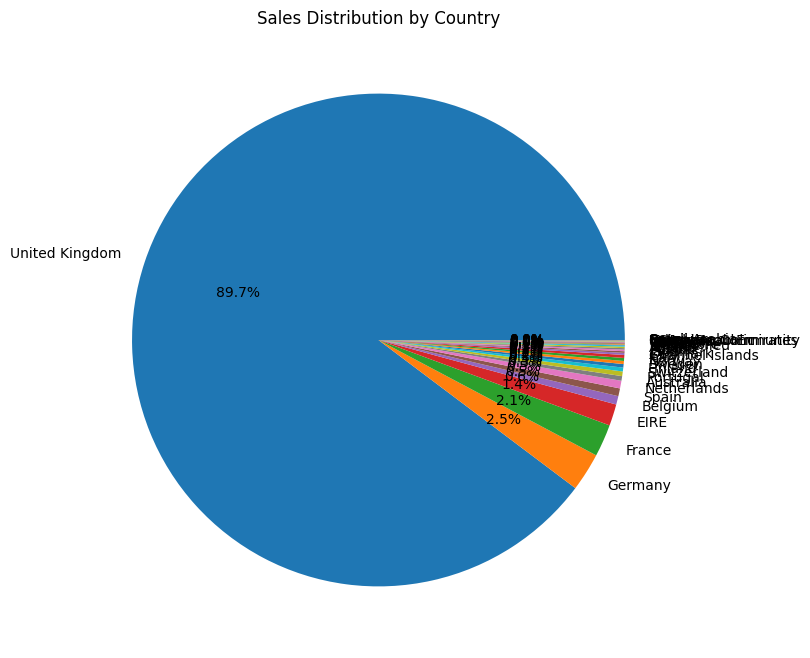

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by 'Country' and counting the unique 'InvoiceNo' to estimate sales volume
sales_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sales_by_country.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Country')
plt.ylabel('')  # Hide the y-label as it's not informative here
plt.show()

### **Average Spend per Invoice**

Objective: To observe the distribution and median of average spend per invoice.

Explanation: The violin plot shows the distribution of average spend per invoice, with the inner markings representing quartiles. It highlights spending patterns, including any significant outliers or variations in customer spending.

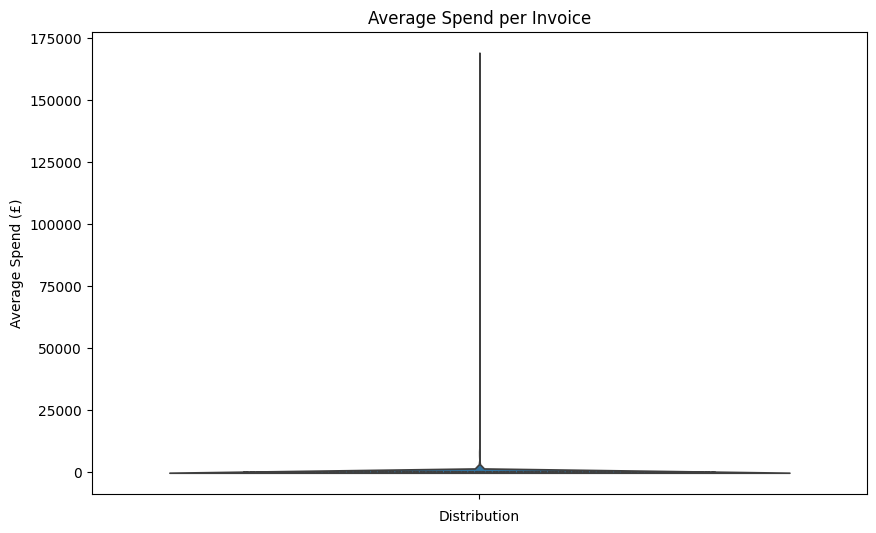

In [ ]:
# Calculating total spend per invoice
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
avg_spend_per_invoice = df.groupby('InvoiceNo')['TotalSpend'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(data=avg_spend_per_invoice, inner="quartile")
plt.title('Average Spend per Invoice')
plt.xlabel('Distribution')
plt.ylabel('Average Spend (£)')
plt.show()